# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
- 
 Analysis based on the Pymaceuticals data (a study on mouse tumor volume and drugs used)

1. The correlation between the mouse weight and the average observed tumor volume is positive (0.83). Correlation coefficent indicates there is a strong positive relationship between the two variables.
   
2. Out of 10 drugs 4 drugs named Capomulin, Ramicane,  Ceftamin,  Infubinol are used in the analysis. The median final tumor volume in mouse using the drugs Capomulin, Ramicane is low compared to the remaining drugs. This indicates that the tumor shrinks in mouse when mediated by Capomulin and Ramicane treatment. Capomulin and Ramicane are effective drugs in treating mouse tumors.
   
3. Line plot from the analysis shows the timepoint (days) and size of the tumor volume for Mouse ID l509 with Capomulin drug treatment. It can be inferred that the size of the tumor decreases with the intake of the Capomulin drug.
   
4. From the bar char we can observe that more number of mouses are treated with the drugs Capomulin and Ramicane.

5. Pie chart plotted for the Gender of Mouse and it shows Male mouse is 2% higher in count.

In [593]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# data_results = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
# # Display the data table for preview
# data_results
data_results=pd.merge(mouse_metadata,study_results,how='right',on='Mouse ID')
data_results= data_results[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
data_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [594]:
# Checking the number of mice.
len(pd.unique(data_results['Mouse ID']))
# num_mice=len(data_results.groupby("Mouse ID"))
# num_mice

249

In [595]:
# To find the size and shape of the dataframe
data_results.size
data_results.shape

(1893, 8)

In [539]:
# duplicate = data_results[data_results.duplicated(["Mouse ID", "Timepoint"])]
# duplicate

In [597]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=data_results.loc[data_results.duplicated(["Mouse ID" , "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [598]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data_results.loc[data_results["Mouse ID"]=='g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [599]:
data_results1 = data_results.copy()
data_results1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [600]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# Drops rows with Mouse ID containing g989 
clean_dataresult =data_results1[data_results1["Mouse ID"] != 'g989']
clean_dataresult

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [601]:
# Checking if the duplicate mouse ID is removed
clean_dataresult["Mouse ID"]=='g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1880, dtype: bool

In [541]:
# clean_dataresult["Mouse ID"].count()

In [544]:
# Drops rows with Mouse ID containing g989 (Another way)
# c= data_results1[data_results1["Mouse ID"].isin(duplicate_mice)==False]
# c

In [546]:
# c["Mouse ID"]=='g989'

In [547]:
# len(pd.unique(c['Mouse ID']))

In [602]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_dataresult['Mouse ID']))

248

## Summary Statistics

In [603]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumorvol = clean_dataresult.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# mean_tumorvol 
median_tumorvol = clean_dataresult.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# median_tumorvol 
variance_tumorvol = clean_dataresult.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# variance_tumorvol
stddev_tumorvol = clean_dataresult.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# stddev_tumorvol
sem_tumorvol = clean_dataresult.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# sem_tumorvol


# Assemble the resulting series into a single summary DataFrame.
statistical_summary = pd.DataFrame({"Mean Tumor Volume" : mean_tumorvol, 
                                    "Median Tumor Volume" : median_tumorvol,  
                                    "Tumor Volume Variance" :variance_tumorvol ,
                                    "Tumor Volume Std. Dev.": stddev_tumorvol ,
                                    "Tumor Volume Std. Err.": sem_tumorvol })
statistical_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [561]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary = clean_dataresult.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics1 = summary["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_statistics1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

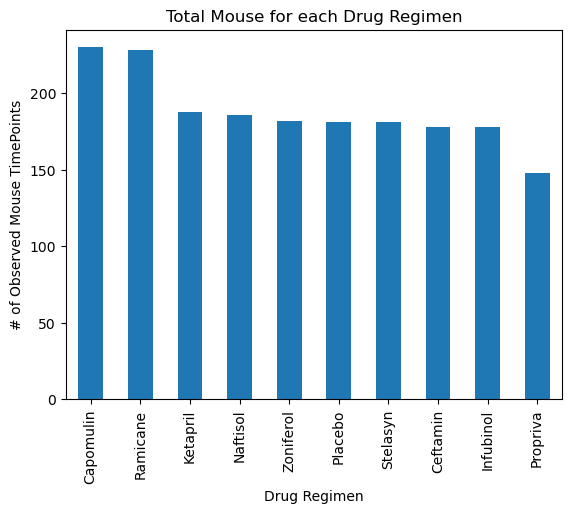

In [622]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

countmouse_drug = clean_dataresult.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug = countmouse_drug.sort_values(ascending=False) 
DrugRegimen_chart = mouse_drug.plot(kind="bar", title="Total Mouse for each Drug Regimen")
DrugRegimen_chart.set_xlabel("Drug Regimen")
DrugRegimen_chart.set_ylabel("# of Observed Mouse TimePoints")
plt.savefig("Images/Total Mouse for each Drug Regimen.png")
plt.show()

In [605]:
countmouse_drug = clean_dataresult.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug=countmouse_drug.sort_values(ascending=False)
mouse_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

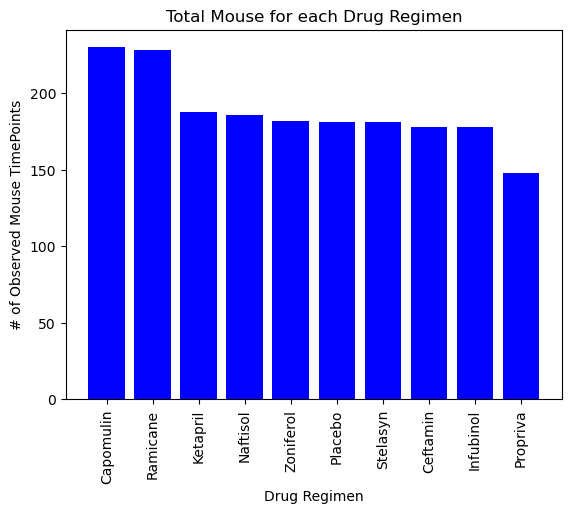

In [632]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

y_axis=mouse_drug.values
x_axis=mouse_drug.index

plt.bar(x_axis,y_axis,color='b',align="center")
plt.title("Total Mouse for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(x_axis,rotation='vertical')
plt.ylabel("# of Observed Mouse TimePoints")
plt.savefig("Images/Total Mouse for each Drug Regimen pyplot.png")

plt.show()


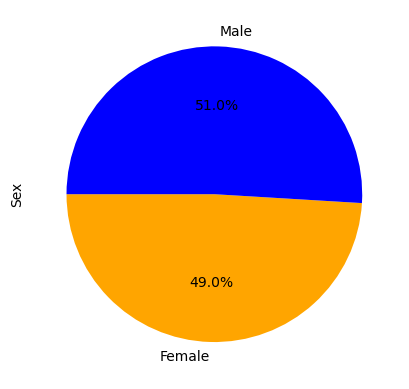

In [625]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse = clean_dataresult.groupby("Sex")
sex_count = sex_mouse["Mouse ID"].count()
sex_count
dist = (sex_count/ total_mouseid) *100
dist
colors=["Orange", "Blue"]
# sex="Male"
# check = dist["Male"]
pie_chart = dist.plot(kind="pie", y=dist, autopct="%1.1f%%",startangle=180,colors=colors)
pie_chart.set_ylabel("Sex")

# plt.axis("equal")
plt.savefig("Images/Male vs Female.png")
plt.show()

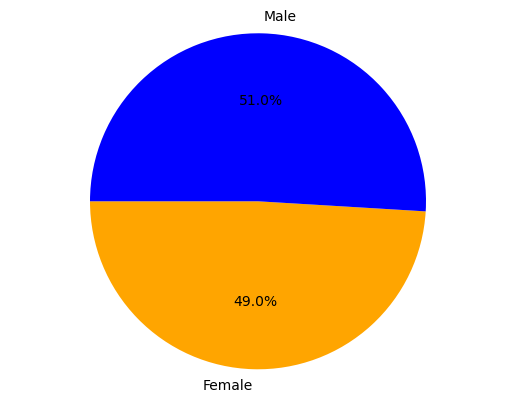

In [627]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse = clean_dataresult.groupby("Sex")
sex_count = sex_mouse["Mouse ID"].count()
sex_count
dist = (sex_count/ total_mouseid) *100
# dist
label = clean_dataresult["Sex"].unique()
plt.pie(dist,labels=label,
           autopct="%1.1f%%",colors=colors, startangle=180)
plt.axis("equal")
plt.savefig("Images/Male vs Female pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [609]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# drug = clean_dataresult[clean_dataresult["Drug Regimen"].isin(treatment_names) ]
# drug
# group_regimens_tocheck = drug.groupby(["Drug Regimen","Mouse ID"]) ['Tumor Volume (mm3)'].max()
# group_regimens_tocheck



# Start by getting the last (greatest) timepoint for each mouse
timepoint_greatest = clean_dataresult.groupby("Mouse ID") ['Timepoint'].max()
# timepoint_greatest
timepoint_greatest_df=pd.DataFrame(timepoint_greatest)
# timepoint_greatest_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(timepoint_greatest_df,clean_dataresult, how ='left', on=(["Mouse ID","Timepoint"]))
# new_df
TumorVolume_lastpoint = new_df[ new_df["Drug Regimen"].isin(treatment_names) ].reset_index(drop=True)
TumorVolume_lastpoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [610]:
Capomulin_df = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]== "Capomulin"].reset_index().round(2)
Capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.98,2,Capomulin,Female,9,22
1,12,b742,45,38.94,0,Capomulin,Male,7,21
2,24,f966,20,30.49,0,Capomulin,Male,16,17
3,25,g288,45,37.07,1,Capomulin,Male,3,19
4,26,g316,45,40.16,2,Capomulin,Female,22,22


In [611]:
Ceftamin_df = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]== "Ceftamin"].reset_index().round(2)
Ceftamin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,2,a275,45,63.00,3,Ceftamin,Female,20,28
1,10,b447,0,45.00,0,Ceftamin,Male,2,30
2,11,b487,25,56.06,1,Ceftamin,Female,6,28
3,13,b759,30,55.74,1,Ceftamin,Female,12,25
4,23,f436,15,48.72,2,Ceftamin,Female,3,25


In [634]:
Ramicane_df = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]== "Ramicane"].reset_index().round(2)
Ramicane_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,3,a411,45,38.41,1,Ramicane,Male,3,22
1,4,a444,45,43.05,0,Ramicane,Female,10,25
2,5,a520,45,38.81,1,Ramicane,Male,13,21
3,7,a644,45,32.98,1,Ramicane,Female,7,17
4,16,c458,30,38.34,2,Ramicane,Female,23,20


In [635]:
Infubinol_df = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]== "Infubinol"].reset_index().round(2)
Infubinol_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.97,2,Infubinol,Female,20,23
1,1,a251,45,65.53,1,Infubinol,Female,21,25
2,6,a577,30,57.03,2,Infubinol,Female,6,25
3,8,a685,45,66.08,3,Infubinol,Male,8,30
4,14,c139,45,72.23,2,Infubinol,Male,11,28


In [615]:
# Put treatments into a list for for loop (and later for plot labels)

# treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# treatment_names list already given above:
# Create empty list to fill with tumor vol data (for plotting)
tumorvolume= []
for drug in treatment_names:
    for i in TumorVolume_lastpoint.index:
        # Locate the rows which contain mice on each drug and get the tumor volumes
        if TumorVolume_lastpoint.iloc[i] ["Drug Regimen"] == drug:
            tumorvolume.append(TumorVolume_lastpoint.iloc[i]["Tumor Volume (mm3)"])
# print(pd.DataFrame(tumorvolume))

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_names:
       
   subset = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]==treatment_names[0]]["Tumor Volume (mm3)"]
   # print(subset)
   
   quartiles = subset.quantile([.25,.5,.75])
   lowerq = quartiles[0.25]
   upperq = quartiles[0.75]
   iqr = upperq-lowerq  
   lower_bound = lowerq - (1.5*iqr)
   upper_bound = upperq + (1.5*iqr)
   outliers = subset.loc[(subset<lower_bound) | (subset>upper_bound)]
   # print(outliers)

print(f"Capomulin:")
print(f"The lower quartile of Capomulin's final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} \n")
print(f"Capomulin's potential outliers:")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")
print(f"Capomulin's potential outliers :{outliers} ")

print("------------------------------------------------------------------")

for drug in treatment_names:
    subset = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]==treatment_names[1]]["Tumor Volume (mm3)"]
     # print(subset)
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset.loc[(subset<lower_bound) | (subset>upper_bound)]
   

print(f"Ramicane:")   
print(f"The lower quartile of Ramicane's final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]}\n ")
print(f"Ramicane's potential outliers:")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")
print(f"Ramicane's potential outliers :{outliers} ")
print("------------------------------------------------------------------")

for drug in treatment_names:
   subset = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]==treatment_names[2]]["Tumor Volume (mm3)"]
   # print(subset)
   quartiles = subset.quantile([.25,.5,.75])
   lowerq = quartiles[0.25]
   upperq = quartiles[0.75]
   iqr = upperq-lowerq
   lower_bound = lowerq - (1.5*iqr)
   upper_bound = upperq + (1.5*iqr)
   outliers = subset.loc[(subset<lower_bound) | (subset>upper_bound)]
   # print(outliers)

print(f"Infubinol:")     
print(f"The lower quartile of Infubinol's final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} \n") 
print(f"Infubinol's potential outliers:")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")
print(f"Infubinol's potential outliers :{outliers} ")
print("------------------------------------------------------------------")

for drug in treatment_names:
   subset = TumorVolume_lastpoint[TumorVolume_lastpoint["Drug Regimen"]==treatment_names[3]]["Tumor Volume (mm3)"]
   # print(subset)
   quartiles = subset.quantile([.25,.5,.75])
   lowerq = quartiles[0.25]
   upperq = quartiles[0.75]
   iqr = upperq-lowerq
   lower_bound = lowerq - (1.5*iqr)
   upper_bound = upperq + (1.5*iqr)
   outliers = subset.loc[(subset<lower_bound) | (subset>upper_bound)]

print(f"Ceftamin:")    
print(f"The lower quartile of Ceftamin's final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]}\n ") 
print(f"Ceftamin's potential outliers:")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n")
print(f"Ceftamin's potential outliers :{outliers} ")
# # print("------------------------------------------------------------------")


Capomulin:
The lower quartile of Capomulin's final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 38.1251644 

Capomulin's potential outliers:
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Capomulin's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: float64) 
------------------------------------------------------------------
Ramicane:
The lower quartile of Ramicane's final tumor volume is: 31.56046955
The upper quartile of final tumor volume is: 40.65900627
The interquartile range of final tumor volume is: 9.098536719999998
The the median of final tumor volume is: 36.56165229
 
Ramicane's potential outliers:
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Ramicane's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: fl

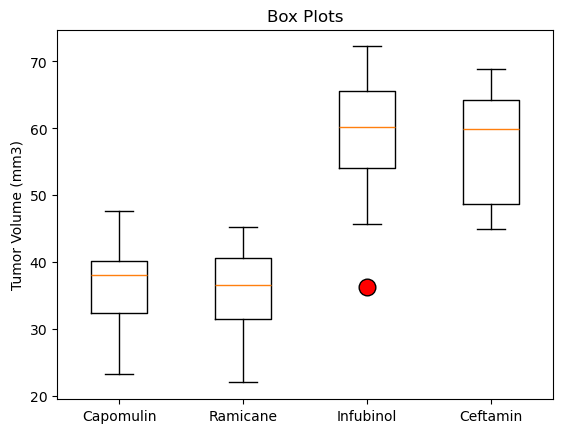

In [636]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
list_plot=[Capomulin_df["Tumor Volume (mm3)"], Ramicane_df["Tumor Volume (mm3)"], Infubinol_df["Tumor Volume (mm3)"], Ceftamin_df["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(list_plot,labels=treatment_names,flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.savefig("Images/Box plots.png")
plt.show()

## Line and Scatter Plots

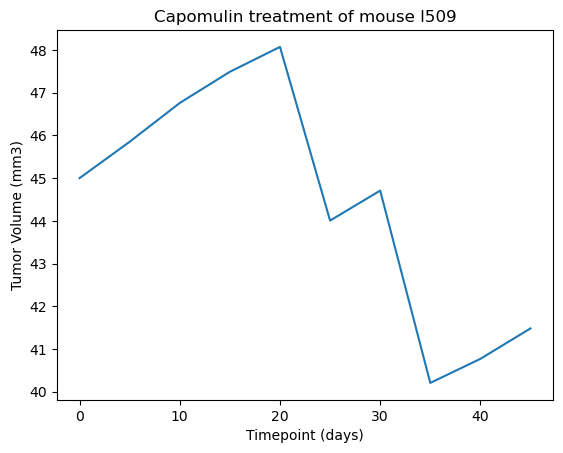

In [629]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
new_Capomulin_df = clean_dataresult[clean_dataresult["Drug Regimen"]=='Capomulin']
# new_Capomulin_df
single_mouseid =new_Capomulin_df[new_Capomulin_df["Mouse ID"]=='l509']
single_mouseid
x_axis = single_mouseid["Timepoint"]
y_axis = single_mouseid["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Images/Capomulin treatment of mouse l509.png")
plt.show()

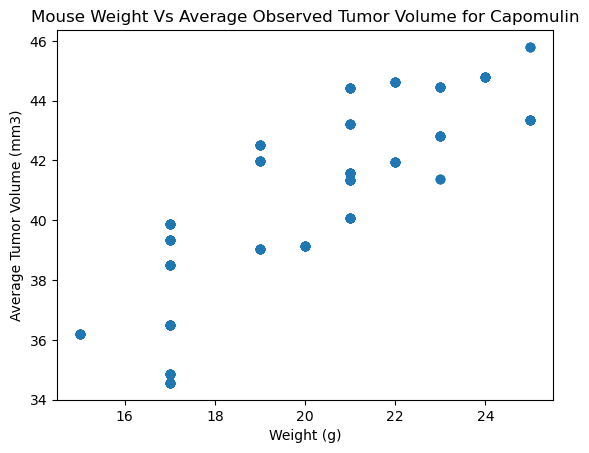

In [630]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# new_Capomulin_df = clean_dataresult[clean_dataresult["Drug Regimen"]=='Capomulin']
# new_Capomulin_df
new_Capomulin_df1=new_Capomulin_df.groupby("Mouse ID") ["Tumor Volume (mm3)"].mean()
new_Capomulin_df2 = pd.merge(new_Capomulin_df1,new_Capomulin_df,on="Mouse ID")
# new_Capomulin_df2.head(20)
x_values = new_Capomulin_df2['Weight (g)']
y_values = new_Capomulin_df2['Tumor Volume (mm3)_x']
plt.scatter(x_values,y_values)
plt.title("Mouse Weight Vs Average Observed Tumor Volume for Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("Images/Mouse Weight Vs Average Observed Tumor Volume for Capomulin.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


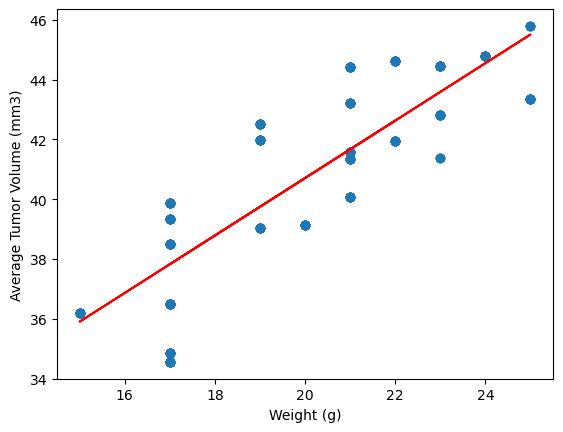

In [631]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = new_Capomulin_df2.iloc[:,8]
tum_vol = new_Capomulin_df2.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tum_vol)
x_values = mouse_weight
y_values = tum_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.savefig("Images/Regression plot.png")
plt.show()